In [81]:
import pandas as pd
import numpy as np
import os

import geopandas as gpd
from geopandas.tools import sjoin
from shapely.geometry import Point, Polygon
import rtree
import pygeos
import fiona
from pykml import parser


pd.options.display.max_columns = 999

In [82]:
os.getcwd()

'/files/ascollanto/01 BARRM DATA CHALLENGE'

# ADMIN Bounds

In [83]:
brgy_bounds = gpd.read_file("1-Geodata/1-ADMINISTRATIVE/Administrative Boundaries - BARMM Barangays ao 20190206 (PSA 2016)/AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp")
brgy_bounds.columns = ['PSGC_REGION','REGION_NAME',
                        'PSGC_PROV','PROV_NAME',
                        'PSGC_MUNI','MUNI_NAME',
                        'PSGC_BRGY','BRGY_NAME',
                        'geometry']
brgy_bounds["geometry"] = brgy_bounds['geometry'].to_crs(epsg=32633)
brgy_bounds["brgy_area"] = brgy_bounds['geometry'].area/ 10**6

brgy_bounds["geometry"] = brgy_bounds['geometry'].to_crs(epsg=4326)

brgy_bounds['BRGY_NAME'] = brgy_bounds['BRGY_NAME'].str.upper()
brgy_bounds['MUNI_NAME'] = brgy_bounds['MUNI_NAME'].str.upper()
brgy_bounds['PROV_NAME'] = brgy_bounds['PROV_NAME'].str.upper()

# brgy_bounds2 = brgy_bounds[['PSGC_BRGY','geometry']]
# brgy_bounds2.geometry = brgy_bounds2.representative_point()
# brgy_bounds2

brgy_bounds.head()

,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,PSGC_BRGY,BRGY_NAME,geometry,brgy_area
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001001,BALIMBING PROPER,"MULTIPOLYGON (((119.95374 5.07851, 119.95384 5...",215.772311
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001002,BATU-BATU (POB.),"POLYGON ((119.88709 5.06919, 119.88709 5.06920...",118.748815
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001003,BUAN,"MULTIPOLYGON (((120.06363 5.16131, 120.06365 5...",668.760968
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001004,DUNGON,"POLYGON ((120.13585 5.19601, 120.13584 5.19603...",768.063541
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001005,LUUK BUNTAL,"MULTIPOLYGON (((119.98776 4.98564, 119.98773 4...",89.609227


In [84]:
muni_bounds = gpd.read_file("1-Geodata/1-ADMINISTRATIVE/Administrative Boundaries - BARMM Municipalities ao 20190206 (PSA 2016)/AdministrativeBoundariesBARMMMunicipalities20190206PSA2016.shp")
muni_bounds.columns = ['PSGC_REGION','REGION_NAME',
                        'PSGC_PROV','PROV_NAME',
                        'PSGC_MUNI','MUNI_NAME',
                        'geometry']

muni_bounds['MUNI_NAME'] = muni_bounds['MUNI_NAME'].str.upper()
muni_bounds['PROV_NAME'] = muni_bounds['PROV_NAME'].str.upper()

muni_bounds["geometry"] = muni_bounds['geometry'].to_crs(epsg=32633)
muni_bounds["muni_area"] = muni_bounds['geometry'].area/ 10**6

muni_bounds["geometry"] = muni_bounds['geometry'].to_crs(epsg=4326)

muni_bounds2 = muni_bounds[['PSGC_MUNI','geometry']]
muni_bounds2.geometry = muni_bounds2.representative_point()
muni_bounds2['LONG'] = muni_bounds2['geometry'].x
muni_bounds2['LAT'] =muni_bounds2['geometry'].y

muni_bounds = muni_bounds.merge(muni_bounds2[['PSGC_MUNI','LONG','LAT']], on = 'PSGC_MUNI', how='left')

muni_bounds.head()

/opt/envs/airflow/lib/python3.6/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153630000,WAO,"POLYGON ((124.82051 7.53628, 124.82037 7.53616...",2512.768462,124.687818,7.638825
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156619000,OMAR,"MULTIPOLYGON (((121.38063 5.92761, 121.38063 5...",1011.094162,121.379209,5.969987
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156609000,PARANG,"MULTIPOLYGON (((120.88153 6.01489, 120.88092 6...",853.566204,120.899869,5.947640
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153800000,MAGUINDANAO,PH153807000,DATU ODIN SINSUAT (DINAIG),"POLYGON ((124.29669 6.98930, 124.26466 6.98042...",3294.689576,124.291252,7.082362
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153621000,PIAGAPO,"POLYGON ((124.10884 7.95196, 124.10220 7.95666...",989.075652,124.176645,7.994843


In [85]:
base_muni = muni_bounds
print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)

125
(125, 10)


## Population

In [86]:
Population_2010_2015 = pd.read_excel("2-Tabular Data/5-Social/Population 2010, 2015 ARMM,BCT.xlsx")
Population_2010_2015 = Population_2010_2015.loc[Population_2010_2015.PSGC_REGI=="PH150000000"].rename(columns = {'PSGC_CITY/MUNI':'PSGC_MUNI'})

Population_2010_2015['Total_under10'] = Population_2010_2015.loc[:, 'sin_age_bot_und_001':'sin_age_bot_009'].sum(axis=1)
Population_2010_2015['Total_10to20'] = Population_2010_2015.loc[:, 'sin_age_bot_010':'sin_age_bot_020'].sum(axis=1)
Population_2010_2015['Total_21to30'] = Population_2010_2015.loc[:, 'sin_age_bot_021':'sin_age_bot_030'].sum(axis=1)
Population_2010_2015['Total_31to44'] = Population_2010_2015.loc[:, 'sin_age_bot_031':'sin_age_bot_044'].sum(axis=1)
Population_2010_2015['Total_45to60'] = Population_2010_2015.loc[:, 'sin_age_bot_045':'sin_age_bot_060'].sum(axis=1)
Population_2010_2015['Total_over60'] = Population_2010_2015.loc[:, 'sin_age_bot_060':'sin_age_bot_080_and_ove'].sum(axis=1)

Population_2010_2015['Male_under10'] = Population_2010_2015.loc[:, 'sin_age_mal_und_001':'sin_age_mal_009'].sum(axis=1)
Population_2010_2015['Male_10to20'] = Population_2010_2015.loc[:, 'sin_age_mal_010':'sin_age_mal_020'].sum(axis=1)
Population_2010_2015['Male_21to30'] = Population_2010_2015.loc[:, 'sin_age_mal_021':'sin_age_mal_030'].sum(axis=1)
Population_2010_2015['Male_31to44'] = Population_2010_2015.loc[:, 'sin_age_mal_031':'sin_age_mal_044'].sum(axis=1)
Population_2010_2015['Male_45to60'] = Population_2010_2015.loc[:, 'sin_age_mal_045':'sin_age_mal_060'].sum(axis=1)
Population_2010_2015['Male_over60'] = Population_2010_2015.loc[:, 'sin_age_mal_060':'sin_age_mal_080_and_ove'].sum(axis=1)

Population_2010_2015['Female_under10'] = Population_2010_2015.loc[:, 'sin_age_fem_und_001':'sin_age_fem_009'].sum(axis=1)
Population_2010_2015['Female_10to20'] = Population_2010_2015.loc[:, 'sin_age_fem_010':'sin_age_fem_020'].sum(axis=1)
Population_2010_2015['Female_21to30'] = Population_2010_2015.loc[:, 'sin_age_fem_021':'sin_age_fem_030'].sum(axis=1)
Population_2010_2015['Female_31to44'] = Population_2010_2015.loc[:, 'sin_age_fem_031':'sin_age_fem_044'].sum(axis=1)
Population_2010_2015['Female_45to60'] = Population_2010_2015.loc[:, 'sin_age_fem_045':'sin_age_fem_060'].sum(axis=1)
Population_2010_2015['Female_over60'] = Population_2010_2015.loc[:, 'sin_age_fem_060':'sin_age_fem_080_and_ove'].sum(axis=1)


Population_2010_2015=Population_2010_2015[['PSGC_MUNI','Pop2010','Pop2015','HH_pop']+
                                          [col for col in Population_2010_2015.columns if '_hh0' in col]+
                                          [col for col in Population_2010_2015.columns if 'Total_' in col]+
                                          [col for col in Population_2010_2015.columns if 'Male_' in col]+
                                          [col for col in Population_2010_2015.columns if 'Female_' in col]]
Population_2010_2015=Population_2010_2015.groupby('PSGC_MUNI').agg(['sum']).reset_index()
Population_2010_2015.columns = Population_2010_2015.columns.droplevel(1)
Population_2010_2015

base_muni = base_muni.merge(Population_2010_2015,on = 'PSGC_MUNI', how= 'left')

del Population_2010_2015

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 58)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH153600000,LANAO DEL SUR,PH153630000,WAO,"POLYGON ((124.82051 7.53628, 124.82037 7.53616...",2512.768462,124.687818,7.638825,40479.0,45862.0,45862.0,9037.0,8216.0,821.0,9037.0,34.0,1438.0,2327.0,2245.0,1666.0,882.0,342.0,8216.0,31.0,1388.0,2228.0,2130.0,1489.0,680.0,220.0,821.0,3.0,50.0,99.0,115.0,177.0,202.0,122.0,11125.0,10675.0,8151.0,7569.0,5502.0,3048.0,5671.0,5393.0,4235.0,3963.0,2920.0,1462.0,5454.0,5282.0,3916.0,3606.0,2582.0,1586.0
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156619000,OMAR,"MULTIPOLYGON (((121.38063 5.92761, 121.38063 5...",1011.094162,121.379209,5.969987,18098.0,25116.0,25116.0,4441.0,4165.0,276.0,4441.0,24.0,652.0,1383.0,1343.0,712.0,217.0,88.0,4165.0,24.0,640.0,1340.0,1244.0,643.0,183.0,73.0,276.0,0.0,12.0,43.0,99.0,69.0,34.0,15.0,7452.0,6746.0,3519.0,4460.0,2445.0,613.0,3679.0,3355.0,1676.0,2081.0,1324.0,322.0,3773.0,3391.0,1843.0,2379.0,1121.0,291.0
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH156600000,SULU,PH156609000,PARANG,"MULTIPOLYGON (((120.88153 6.01489, 120.88092 6...",853.566204,120.899869,5.947640,58028.0,62172.0,62172.0,9858.0,9360.0,498.0,9858.0,18.0,1119.0,3380.0,3344.0,1402.0,442.0,118.0,9360.0,18.0,1086.0,3273.0,3183.0,1301.0,380.0,89.0,498.0,0.0,33.0,107.0,161.0,101.0,62.0,29.0,18131.0,17384.0,8681.0,11091.0,5590.0,1523.0,8624.0,8390.0,4001.0,5333.0,3046.0,783.0,9507.0,8994.0,4680.0,5758.0,2544.0,740.0


## Ethnicity

In [87]:
ethnicity = pd.read_excel("2-Tabular Data/5-Social/Household Population by Ethnicity (ARMM, 2010)/Household Population by Ethnicity (ARMM, 2010) Brgy.xlsx").rename(columns = {'PSGC':'PSGC_BRGY'}) #household level i think
ethnicity = ethnicity.loc[:, (ethnicity != 0).any(axis=0)]
ethnicity = ethnicity.merge(brgy_bounds[['PSGC_BRGY','PSGC_MUNI','PSGC_PROV']],on= 'PSGC_BRGY',how = 'left')

muni_ethn = ethnicity.loc[:,'Total':'PSGC_MUNI'].groupby('PSGC_MUNI').agg([sum])
muni_ethn.columns = muni_ethn.columns.droplevel(1)
muni_ethn = muni_ethn.add_prefix('ETHNICITY_').reset_index()

base_muni = base_muni.merge(muni_ethn, on = 'PSGC_MUNI', how = 'left')

del ethnicity, muni_ethn

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 236)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

## Gainful Workers

In [88]:
work_2015 = pd.read_excel("2-Tabular Data/5-Social/GainfulWorkers15YearsOldandOverbyMajorOccupationGroupAgeGroupSex(ARMM 2015)/Gainful Workers 15 Years Old and Over by Major Occupation Group, Age Group, Sex (ARMM 2015) Barangay.xlsx").rename(columns= {'PSGC':'PSGC_BRGY'})
work_2015 = work_2015.merge(brgy_bounds[['PSGC_PROV', 'PSGC_MUNI','PSGC_BRGY']],on = 'PSGC_BRGY', how= 'left')

muni_work = work_2015[['PSGC_MUNI']+[col for col in work_2015.columns if 'ovr' in col]].groupby('PSGC_MUNI').agg([sum])
muni_work.columns = muni_work.columns.droplevel(1)
muni_work = muni_work.add_prefix('MUNI_').reset_index()

base_muni = base_muni.merge(muni_work,on ='PSGC_MUNI', how = 'left')

del work_2015,muni_work

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 275)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

## Access to Banks

In [89]:
# location of banks kulang
barmm_banks = gpd.read_file("1-Geodata/6-ECONOMIC/Economic - Location of Banks in ARMM (Bangko Sentral ng Pilipinas, 2018)/Economic - Location of Banks, 2018 - ARMM - Bangko Sentral ng Pilipinas.shp")
barmm_banks["geometry"] = barmm_banks['geometry'].to_crs(epsg=4326)

barmm_banks['PSGC_PROV'] = ['PH150700000','PH153600000','PH153600000','PH153600000','PH153800000','PH153800000','PH153800000','PH153800000','PH153800000','PH156600000','PH157000000']
barmm_banks['PSGC_MUNI'] = ['PH150702000','PH153617000','PH153638000','PH153630000','PH153803000','PH153807000','PH153805000','PH153811000','PH153812000','PH156602000','PH157002000']

barmm_banks = barmm_banks.merge(muni_bounds[['PSGC_MUNI','muni_area']],how='left',on='PSGC_MUNI')

barmm_banks['On_site_over_muni_area'] = barmm_banks['On-site']/barmm_banks['muni_area']
barmm_banks['Off_site_over_muni_area'] = barmm_banks['Off-site']/barmm_banks['muni_area']
barmm_banks['Total_Banks_over_muni_area'] = barmm_banks['Total']/barmm_banks['muni_area']

barmm_banks

base_muni = base_muni.merge(barmm_banks[['PSGC_MUNI','On-site', 'Off-site', 'Total', 'On_site_over_muni_area', 'Off_site_over_muni_area','Total_Banks_over_muni_area']], on = 'PSGC_MUNI', how = 'left')

del barmm_banks

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 281)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

In [90]:
google_banks = pd.read_csv('Processed/Viz_BARMM_Commerce_Banks.csv')

base_muni = base_muni.merge(google_banks.groupby('PSGC_MUNI').agg({"ID": lambda x: x.nunique()}).reset_index().rename(columns = {"ID":'Bank_Count'}), on = 'PSGC_MUNI', how = 'left')

del google_banks

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 282)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

## Firms

In [91]:
firms = pd.read_csv('Processed/Viz_BARMM_Commerce_Firms.csv')

base_muni = base_muni.merge(firms.groupby('PSGC_MUNI').agg({"ID": lambda x: x.nunique()}).reset_index().rename(columns = {"ID":'Firm_Count'}), on = 'PSGC_MUNI', how = 'left')

del firms

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 283)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

In [92]:
dti_businesses = gpd.read_file("1-Geodata/6-ECONOMIC/Economic - DTI Registered Firms in ARMM (DTI, 2013)/Economic - DTI Registered Firms, 2013 - ARMM DTI.shp")
dti_businesses = dti_businesses[['Mun_Code','RHU Sheet1','Establishm','Population']]
dti_businesses['Establishm'] = pd.to_numeric(dti_businesses['Establishm'])
dti_businesses.columns = ['PSGC_MUNI','RHU_Count','MUNI_Establishment_Count','Population']

base_muni = base_muni.merge(dti_businesses[['PSGC_MUNI','MUNI_Establishment_Count']], on = 'PSGC_MUNI', how = 'left')

del dti_businesses

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 284)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

## Hospitals and RHUs

In [93]:
hosp_rhus = pd.read_csv('Processed/Viz_BARMM_Health_Hospitals.csv')

base_muni = base_muni.merge(hosp_rhus.groupby(['PSGC_MUNI','SUBTYPE']).agg({"ID": lambda x: x.nunique()}).reset_index().pivot_table(index=['PSGC_MUNI'], columns=['SUBTYPE'], values='ID').reset_index(),
                            on = 'PSGC_MUNI', how = 'left')

base_muni['hosp_over_muni_area'] = base_muni['Hospital']/base_muni['muni_area']
base_muni['rhus_over_muni_area'] = base_muni['Rural Health Unit']/base_muni['muni_area']

del hosp_rhus

print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)
base_muni.head(3)

125
(125, 288)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

## Hazards

In [94]:
floods = pd.read_csv('Processed/Viz_BARMM_Hazards_Floods.csv')
floods = floods.groupby(['PSGC_MUNI','NAME']).agg({'PSGC_BRGY': lambda x:x.nunique()}).reset_index().pivot_table(index=['PSGC_MUNI'], columns=['NAME'], values='PSGC_BRGY').reset_index()
floods = floods.set_index('PSGC_MUNI').add_prefix('FloodRisk_BrgyCount_').reset_index().fillna(0)

base_muni = base_muni.merge(floods,on = 'PSGC_MUNI',how ='left')
print(base_muni.PSGC_MUNI.nunique())
print(base_muni.shape)

del floods
base_muni.head(3)

125
(125, 290)


,PSGC_REGION,REGION_NAME,PSGC_PROV,PROV_NAME,PSGC_MUNI,MUNI_NAME,geometry,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agta-Taboy,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_Ayangan,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Banao,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Buhid,ETHNICITY_Buhid (Bangon),ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Calinga,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Cuyonon/ Cuyonen,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Direrayaan,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itawis,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Iwak/ Iowak/ Owak/ I-wak,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalanguya-Ikalahan,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kalinga,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Karulano,ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Livunganen,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Magbekin/ Magbukon/ Magbukun,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Blit,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masadiit,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Muyadan,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/

In [95]:
# base_muni.to_csv('Processed/ForModelling_BARMM_Muni.csv')
base_muni = pd.read_csv('Processed/ForModelling_BARMM_Muni.csv').drop(columns = ['Unnamed: 0'])

model_muni=base_muni.drop(columns = ['PSGC_REGION','REGION_NAME', 'PSGC_PROV','PROV_NAME', 'MUNI_NAME', 'geometry']).set_index('PSGC_MUNI')

# Modelling

In [98]:
model_muni = model_muni.loc[:, (model_muni != 0).any(axis=0)] #deleting columns that are all zeroes
model_muni = model_muni.fillna(0)
model_muni.isna().sum()

muni_area                              0
LONG                                   0
LAT                                    0
Pop2010                                0
Pop2015                                0
                                      ..
Rural Health Unit                      0
hosp_over_muni_area                    0
rhus_over_muni_area                    0
FloodRisk_BrgyCount_High               0
FloodRisk_BrgyCount_Low to Moderate    0
Length: 283, dtype: int64

In [99]:
features = model_muni

### Remove Constants/Quasi Constants

In [100]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(features)
constant_columns = [column for column in features.columns
                    if column not in features.columns[constant_filter.get_support()]]

print(">> Constant Columns:",len(constant_columns),"\n")
print(constant_columns)

features = features.drop(columns = constant_columns)
    
qconstant_filter = VarianceThreshold(threshold=0.05)
qconstant_filter.fit(features)
qconstant_columns = [column for column in features.columns
                    if column not in features.columns[qconstant_filter.get_support()]]

print("\n >> Quasi Constant Columns:",len(qconstant_columns),"\n")
print(qconstant_columns)

features_const = features.drop(columns = qconstant_columns)

print("\n\n New dimensions of X:",features_const.shape)

features_const.head()

>> Constant Columns: 0 

[]

 >> Quasi Constant Columns: 24 

['ETHNICITY_Agta-Taboy', 'ETHNICITY_Ayangan', 'ETHNICITY_Banao', 'ETHNICITY_Buhid', 'ETHNICITY_Buhid (Bangon)', 'ETHNICITY_Calinga', 'ETHNICITY_Cuyonon/ Cuyonen', 'ETHNICITY_Direrayaan', 'ETHNICITY_Itawis', 'ETHNICITY_Iwak/ Iowak/ Owak/ I-wak', 'ETHNICITY_Kalanguya-Ikalahan', 'ETHNICITY_Kalinga', 'ETHNICITY_Karulano', "ETHNICITY_Ke'ney or Ken-ey/Tau't-Bato", 'ETHNICITY_Livunganen', 'ETHNICITY_Magbekin/ Magbukon/ Magbukun', 'ETHNICITY_Manobo-Blit', 'ETHNICITY_Masadiit', 'ETHNICITY_Muyadan', 'On_site_over_muni_area', 'Off_site_over_muni_area', 'Total_Banks_over_muni_area', 'hosp_over_muni_area', 'rhus_over_muni_area']


 New dimensions of X: (125, 259)


,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Agay,ETHNICITY_Agta-Dumagat,ETHNICITY_Agta-Tabangnon,ETHNICITY_Agutaynen,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Applai,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ata-Manobo,ETHNICITY_Ati,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bagobo,ETHNICITY_Bagobo-Tagabawa,ETHNICITY_Bajao/ Bajau,ETHNICITY_Balangao,ETHNICITY_Balatok,ETHNICITY_Baliwon/ Gaddang,ETHNICITY_Bangon,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batak,ETHNICITY_Batangan,ETHNICITY_Belwang,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bontok,ETHNICITY_Bugkalot/ Ilongot,ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Capizeño,ETHNICITY_Caviteño,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Diangan,ETHNICITY_Dibabawon,ETHNICITY_Dibabeen Mulitaan,ETHNICITY_Dibaben,ETHNICITY_Dumagat,ETHNICITY_Eskaya,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Halawodnon,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Higaonon,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ibanag,ETHNICITY_Ibatan,ETHNICITY_Ifugao,ETHNICITY_Ilianen,ETHNICITY_Illaud,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Iraya,ETHNICITY_Isinai,ETHNICITY_Isneg/ Isnag/ Apayao,ETHNICITY_Isoroken,ETHNICITY_Itneg/ Tingguian,ETHNICITY_Ivatan,ETHNICITY_Jama Mapun,ETHNICITY_Kabayukan,ETHNICITY_Kabihug,ETHNICITY_Kadaklan/ Kachakran,ETHNICITY_Kailawan/ Kaylawan,ETHNICITY_Kalagan,ETHNICITY_Kalanguya,ETHNICITY_Kalibugan/ Kolibugan,ETHNICITY_Kamiguin,ETHNICITY_Kankanaey,ETHNICITY_Kapampangan,ETHNICITY_Karay-a,ETHNICITY_Kirenteken,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Malaueg,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Pala'wan/ Palawan-o,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Ratagnon,ETHNICITY_Remontado,ETHNICITY_Romblomanon,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/Tboli,ETHNICITY_Tadyawan,ETHNICITY_Tagabawa,ETHNICITY_Tagakaulo,ETHNICITY_Tagalog,ETHNICITY_Tagbanua,ETHNICITY_Tagbanua (Kalamianen),ETHNICITY_Tagbanua/ Calamian,ETHNICITY_Talaandig,ETHNICITY_Talaingod,ETHNICITY_Tau-buid,ETHNICITY_Tausug,ETHNICITY_Teduray,ETHNICITY_Tigwahanon,ETHNICITY_Tinananen,ETHNICITY_Tuwali,ETHNICITY_Waray,ETHNICITY_Yakan,ETHNICITY_Yapayao,ETHNICITY_Yogad,ETHNICITY_Zambageño-Chavacano,ETHNICITY_Zambal,ETHNICITY_Other Local Ethnicity,ETHNICITY_American/ English,ETHNICITY_Other Foreign

## Outlier treatment

In [101]:
print("Before outlier treatment:\n", features_const.shape)

train = features_const
for column in train:
    vals = train[column]
    VAR_1ST = np.percentile(vals, 6) # return 1st percentile, e.g median.
    VAR_95TH = np.percentile(vals, 95) # return 99th percentile, e.g median.
    print(column,"VAR_1ST = ",VAR_1ST, "VAR_95TH = ", VAR_95TH)
    train[column] = np.where(train[column] < VAR_1ST, VAR_1ST, train[column])
    train[column] = np.where(train[column] > VAR_95TH, VAR_95TH, train[column])
    
features_const = train

print("Before outlier treatment:\n", features_const.shape)

Before outlier treatment:
 (125, 259)
muni_area VAR_1ST =  145.7544039411673 VAR_95TH =  3115.766419849663
LONG VAR_1ST =  120.13007205196394 VAR_95TH =  124.77783258335906
LAT VAR_1ST =  5.234947790426161 VAR_95TH =  7.987045456118025
Pop2010 VAR_1ST =  4686.32 VAR_95TH =  71538.4
Pop2015 VAR_1ST =  5452.119999999999 VAR_95TH =  80757.4
HH_pop VAR_1ST =  5452.119999999999 VAR_95TH =  80363.8
num_hh0 VAR_1ST =  917.9599999999998 VAR_95TH =  14822.799999999996
num_hh0_mal VAR_1ST =  874.3199999999999 VAR_95TH =  13008.399999999998
num_hh0_fem VAR_1ST =  37.63999999999999 VAR_95TH =  1230.3999999999996
num_hh0_both VAR_1ST =  917.9599999999998 VAR_95TH =  14822.799999999996
bel_20_hh0 VAR_1ST =  1.4399999999999995 VAR_95TH =  81.19999999999996
20-29_hh0 VAR_1ST =  117.63999999999999 VAR_95TH =  2047.3999999999996
30-39_hh0 VAR_1ST =  256.4 VAR_95TH =  4304.599999999999
40-49_hh0 VAR_1ST =  250.55999999999995 VAR_95TH =  4255.599999999999
50-59_hh0 VAR_1ST =  163.56 VAR_95TH =  2390.0
60-

In [102]:
features_const = features_const.loc[:, (features_const != 0).any(axis=0)] #deleting columns that are all zeroes

In [103]:
features_const.shape

(125, 204)

In [104]:
features_const.head()

,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Tabangnon,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ati,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bajao/ Bajau,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batangan,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ilianen,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Isinai,ETHNICITY_Isoroken,ETHNICITY_Kankanaey,ETHNICITY_Karay-a,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/Tboli,ETHNICITY_Tadyawan,ETHNICITY_Tagabawa,ETHNICITY_Tagakaulo,ETHNICITY_Tagalog,ETHNICITY_Tagbanua,ETHNICITY_Tagbanua (Kalamianen),ETHNICITY_Tagbanua/ Calamian,ETHNICITY_Talaandig,ETHNICITY_Talaingod,ETHNICITY_Tau-buid,ETHNICITY_Tausug,ETHNICITY_Teduray,ETHNICITY_Tigwahanon,ETHNICITY_Tinananen,ETHNICITY_Tuwali,ETHNICITY_Waray,ETHNICITY_Yakan,ETHNICITY_Yapayao,ETHNICITY_Zambageño-Chavacano,ETHNICITY_Zambal,ETHNICITY_Other Local Ethnicity,ETHNICITY_Other Foreign Ethnicity,ETHNICITY_Not Stated,MUNI_tot_15_ovr_both_sexes,MUNI_man_15_ovr_both_sexes,MUNI_pro_15_ovr_both_sexes,MUNI_tec_15_ovr_both_sexes,MUNI_cle_15_ovr_both_sexes,MUNI_ser_15_ovr_both_sexes,MUNI_ski_15_ovr_both_sexes,MUNI_cra_15_ovr_both_sexes,MUNI_pla_15_ovr_both_sexes,MUNI_ele_15_ovr_both_sexes,MUNI_arm_15_ovr_both_sexes,MUNI_oth_15_ovr_both_sexes,MUNI_oth_15_ovr_both_sexes.1,MUNI_tot_15_ovr_mal,MUNI_man_15_ovr_mal,MUNI_pro_15_ovr_mal,MUNI_tec_15_ovr_mal,MUNI_cle_15_ovr_mal,MUNI_ser_15_ovr_mal,MUNI_ski_15_ovr_mal,MUNI_cra_15_ovr_mal,MUNI_pla_15_ovr_mal,MUNI_ele_15_ovr_mal,MUNI_arm_15_ovr_mal,MUNI_oth_15_ovr_mal.1,MUNI_tot_15_ovr_fem,MUNI_man_15_ovr_fem,MUNI_pro_15_ovr_fem,MUNI_tec_15_ovr_fem,MUNI_cle_15_ovr_fem,MUNI_ser_15_ovr_fem,MUNI_ski_15_ovr_fem,MUNI_cra_15_ovr_fem,MUNI_pla_15_ovr_fem,MUNI_ele_15_ovr_fem,MUNI_arm_15_ovr_fem,MUNI_oth_15_ovr_fem.1,On-site,Total,Bank_Count,Firm_Count,MUNI_Establishment_Count,Hospital,Rural Health Unit,FloodRisk_BrgyCount_High,FloodRisk_BrgyCount_Low to Moderate
PSGC_MUNI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

### Scale the data

In [105]:
from sklearn.preprocessing import MinMaxScaler
#Getting binary variables
bool_cols = [col for col in features_const
             if np.isin(features[col].dropna().unique(), [0, 1]).all()]

binary = bool_cols
numeric = list(features_const.drop(binary, axis=1))

features_ = list(features_const)
num = features_const.loc[:, numeric]
scaler = MinMaxScaler()
scaler.fit(num)

def scale(data):
    num = data.loc[:, numeric]
    num = pd.DataFrame(scaler.transform(num), columns=num.columns).set_index(num.index)
    cat = data[binary]
    scaled = pd.concat([num, cat], axis=1).loc[:, features_]
    return scaled

features = scale(features_const)

### PCA (Checking for the number of Principal Components .8 threshold)

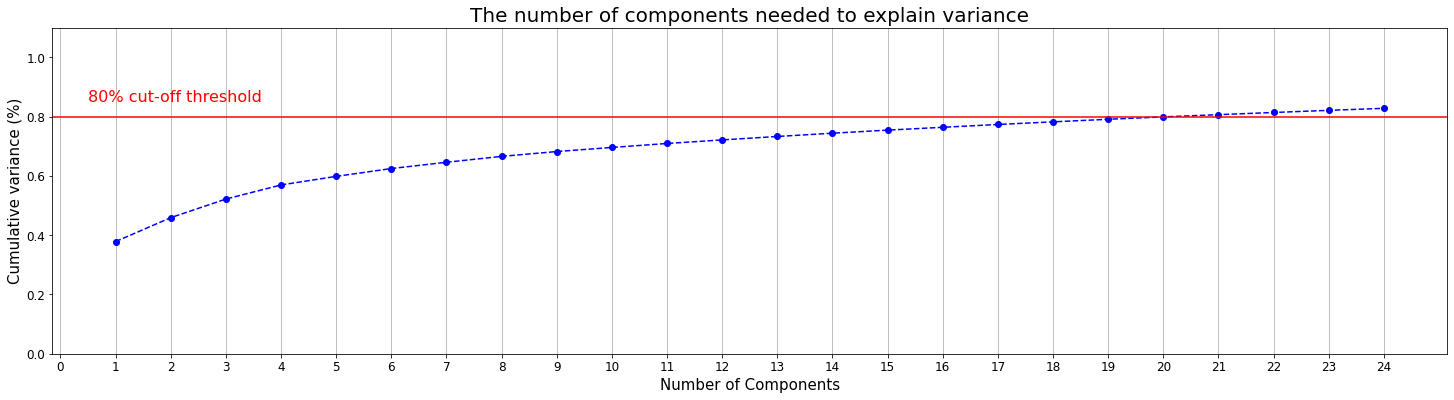

In [106]:
from sklearn.decomposition import PCA
pca = PCA().fit(features)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
y = y[:24]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize = 15)
plt.xticks(np.arange(0, 25, step=1),fontsize=12) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)', fontsize = 15)
plt.yticks(fontsize=12)
plt.title('The number of components needed to explain variance', fontsize = 20)


plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# 20 components to explain 80% of the variance

In [107]:
#Doing this just to plot (Note: This only shows around 50% of the variance of the data)

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, index=features.index)

In [108]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PSGC_MUNI,,,,,,,,,,,,,,,,,,,,
PH153630000,4.223664,2.048053,0.212687,1.439901,2.298896,-0.945480,0.571200,1.840983,1.124839,-1.505345,0.254201,-0.385756,-0.583457,-1.019945,1.212247,-1.043924,-0.890036,0.211054,-0.258432,0.326192
PH156619000,-0.604924,-1.137897,-0.461324,-0.134248,0.141479,-0.368447,0.248143,0.033991,-0.172273,-0.263236,-0.260986,-0.101913,0.084496,0.000085,-0.114086,0.221696,-0.130926,0.371445,-0.159607,0.159456
PH156609000,2.397627,-1.984837,0.126658,-1.010107,0.114574,-0.885756,0.501321,-0.550097,-0.011690,-0.180187,0.263369,-0.113276,0.463175,-0.545667,-0.176863,-0.193355,-0.259125,0.260544,0.391491,-0.097599
PH153807000,7.675335,2.762362,-1.063636,-1.163791,-1.761750,0.331523,-0.432049,0.719346,-1.302162,-0.094385,0.222612,-1.739034,0.288213,0.560983,-0.492286,0.531292,-0.786707,-0.020889,-0.172774,-0.439457
PH153621000,-1.101091,-0.030083,0.410997,0.071824,-0.049276,-0.169374,0.093591,-0.356056,-0.095088,-0.108484,-0.096023,-0.273486,0.112087,-0.090907,0.018641,-0.124098,0.032397,0.050013,-0.219865,0.232152
PH150704000,1.669156,-1.237465,-0.274392,0.914549,-0.148876,0.061785,-0.964391,0.232979,-0.091132,0.555995,-0.526707,-0.835980,-0.512622,-0.225464,0.378957,0.568554,-0.321706,1.453305,-0.260066,-0.017599
PH153813000,-1.005436,0.662610,-0.666425,-0.983377,-0.506258,0.209513,0.182670,0.156409,-0.055993,-0.168396,0.003286,-0.210586,-0.740611,0.156015,0.058461,0.182025,-0.115708,-0.640381,-0.046953,0.218772
PH157005000,0.400633,-1.598766,-0.815821,0.564614,0.388577,1.121079,0.349307,0.252403,-0.155738,0.240820,0.383784,0.484352,0.148230,-0.232122,-0.170631,-0.164716,-0.434788,-0.321658,-0.109534,0.195044
PH153831000,-0.971366,0.224984,-0.240615,-0.517232,-0.349756,-0.152224,-0.227427,-0.081251,-0.245308,-0.186251,0.247913,0.098779,-0.126626,-0.370858,-0.163094,-0.061351,0.192136,-0.151016,0.125888,0.170343


# K-Means Clustering

## Elbow Method to Find Cluster

In [109]:
from sklearn.cluster import KMeans

sse = []
#instantiate kmeans
for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(principalDf)
    sse.append(km.inertia_)

(array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

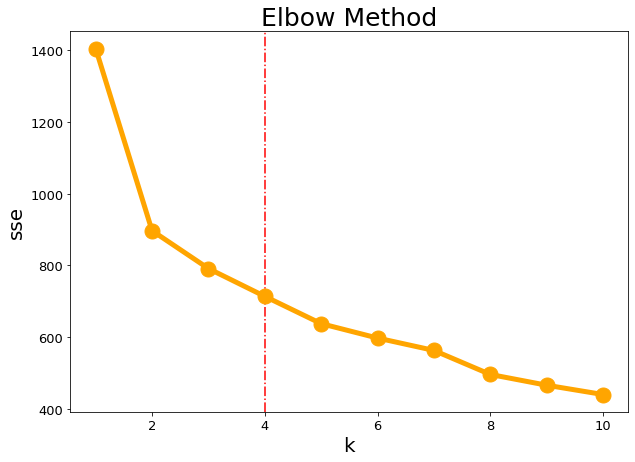

In [110]:
#Plot the results
plt.figure(figsize=(10,7))
plt.axvline(x=4, color='red', linestyle='-.')
plt.plot(range(1,11), sse, marker='o',markersize=15,linewidth=5,markerfacecolor='orange',color='orange')
plt.title('Elbow Method', fontsize = 25)
plt.xlabel("k", fontsize=20)
plt.ylabel("sse", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks( fontsize=13)

In [129]:
#Fit kmeans to the dataset with k=4
km=KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
#list cluster, names y_means
y_means = km.fit_predict(principalDf)

In [130]:
model_muni['Cluster'] = y_means
model_muni = model_muni.merge(muni_bounds2[['PSGC_MUNI','LONG','LAT']], on ='PSGC_MUNI',how='left')
model_muni.to_csv('Processed/Muni_wClusters.csv')
model_muni.to_excel('Processed/Muni_wClusters.xlsx')
model_muni.Cluster.value_counts()

0    87
3    25
2     7
1     6
Name: Cluster, dtype: int64

### Describe Clusters based on Unscaled Data

In [131]:
features_const.head()

,muni_area,LONG,LAT,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,num_hh0_both,bel_20_hh0,20-29_hh0,30-39_hh0,40-49_hh0,50-59_hh0,60-69_hh0,70-79_hh0,num_hh0_mal.1,bel_20_hh0_mal,20-29_hh0_mal,30-39_hh0_mal,40-49_hh0_mal,50-59_hh0_mal,60-69_hh0_mal,70-79_hh0_mal,num_hh0_fem.1,bel_20_hh0_fem,20-29_hh0_fem,30-39_hh0_fem,40-49_hh0_fem,50-59_hh0_fem,60-69_hh0_fem,70-79_hh0_fem,Total_under10,Total_10to20,Total_21to30,Total_31to44,Total_45to60,Total_over60,Male_under10,Male_10to20,Male_21to30,Male_31to44,Male_45to60,Male_over60,Female_under10,Female_10to20,Female_21to30,Female_31to44,Female_45to60,Female_over60,ETHNICITY_Total,ETHNICITY_Abelling/Abellen/Aberling/Aborlin,ETHNICITY_Adasen,ETHNICITY_Aeta/Ayta,ETHNICITY_Agta-Cimaron,ETHNICITY_Agta-Tabangnon,ETHNICITY_Akeanon,ETHNICITY_Alangan,ETHNICITY_Ambala,ETHNICITY_Aromanen-Manobo,ETHNICITY_Ata,ETHNICITY_Ata/ Negrito,ETHNICITY_Ati,ETHNICITY_B'laan/ Blaan,ETHNICITY_Badjao,ETHNICITY_Bago,ETHNICITY_Bajao/ Bajau,ETHNICITY_Bantoanon,ETHNICITY_Banwaon,ETHNICITY_Batangan,ETHNICITY_Bikol/Bicol,ETHNICITY_Binongan,ETHNICITY_Bisaya/ Binisaya,ETHNICITY_Boholano,ETHNICITY_Bukidnon,ETHNICITY_Cagayanen,ETHNICITY_Caviteño-Chavacano,ETHNICITY_Cebuano,ETHNICITY_Chinese,ETHNICITY_Clata/Klata,ETHNICITY_Cotabateño,ETHNICITY_Cotabateño-Chavacano,ETHNICITY_Davao-Chavacano,ETHNICITY_Davaweño,ETHNICITY_Gubatnon,ETHNICITY_Guiangan,ETHNICITY_Hanunuo,ETHNICITY_Henanga,ETHNICITY_Hiligaynon Ilonggo,ETHNICITY_Ibaloi/ Ibaloy,ETHNICITY_Ilianen,ETHNICITY_Ilocano,ETHNICITY_Iranon/ Iranun/ Iraynon,ETHNICITY_Isinai,ETHNICITY_Isoroken,ETHNICITY_Kankanaey,ETHNICITY_Karay-a,ETHNICITY_Lahitanen,ETHNICITY_Lambangian,ETHNICITY_Langilan,ETHNICITY_Mabaka,ETHNICITY_Maeng,ETHNICITY_Magahats,ETHNICITY_Mag-indi,ETHNICITY_Magkunana,ETHNICITY_Maguindanao,ETHNICITY_Majokayong,ETHNICITY_Mamanwa,ETHNICITY_Mandaya,ETHNICITY_Mangguangan,ETHNICITY_Manobo,ETHNICITY_Manobo-Dulangan,ETHNICITY_Mansaka,ETHNICITY_Manubo-Ubo/ Manobo-Ubo,ETHNICITY_Maranao,ETHNICITY_Masbateño/Masbatenon,ETHNICITY_Matigsalog/ Matigsalug,ETHNICITY_Molbog,ETHNICITY_Obu-Manuvu/ Ubo-Manobo,ETHNICITY_Palawani,ETHNICITY_Pan-ayanon,ETHNICITY_Panay-Bukidnon,ETHNICITY_Pangasinan/ Panggalato,ETHNICITY_Parananum,ETHNICITY_Pulangien/ Pulangiyen,ETHNICITY_Sama Badajo,ETHNICITY_Sama Bangingi,ETHNICITY_Sama Laut,ETHNICITY_Sama/Samal,ETHNICITY_Sangil,ETHNICITY_Sibuyan Mangyan-Tagabukid,ETHNICITY_Subanen/ Subanon/ Subanun,ETHNICITY_Surigaonon,ETHNICITY_T'boli/Tboli,ETHNICITY_Tadyawan,ETHNICITY_Tagabawa,ETHNICITY_Tagakaulo,ETHNICITY_Tagalog,ETHNICITY_Tagbanua,ETHNICITY_Tagbanua (Kalamianen),ETHNICITY_Tagbanua/ Calamian,ETHNICITY_Talaandig,ETHNICITY_Talaingod,ETHNICITY_Tau-buid,ETHNICITY_Tausug,ETHNICITY_Teduray,ETHNICITY_Tigwahanon,ETHNICITY_Tinananen,ETHNICITY_Tuwali,ETHNICITY_Waray,ETHNICITY_Yakan,ETHNICITY_Yapayao,ETHNICITY_Zambageño-Chavacano,ETHNICITY_Zambal,ETHNICITY_Other Local Ethnicity,ETHNICITY_Other Foreign Ethnicity,ETHNICITY_Not Stated,MUNI_tot_15_ovr_both_sexes,MUNI_man_15_ovr_both_sexes,MUNI_pro_15_ovr_both_sexes,MUNI_tec_15_ovr_both_sexes,MUNI_cle_15_ovr_both_sexes,MUNI_ser_15_ovr_both_sexes,MUNI_ski_15_ovr_both_sexes,MUNI_cra_15_ovr_both_sexes,MUNI_pla_15_ovr_both_sexes,MUNI_ele_15_ovr_both_sexes,MUNI_arm_15_ovr_both_sexes,MUNI_oth_15_ovr_both_sexes,MUNI_oth_15_ovr_both_sexes.1,MUNI_tot_15_ovr_mal,MUNI_man_15_ovr_mal,MUNI_pro_15_ovr_mal,MUNI_tec_15_ovr_mal,MUNI_cle_15_ovr_mal,MUNI_ser_15_ovr_mal,MUNI_ski_15_ovr_mal,MUNI_cra_15_ovr_mal,MUNI_pla_15_ovr_mal,MUNI_ele_15_ovr_mal,MUNI_arm_15_ovr_mal,MUNI_oth_15_ovr_mal.1,MUNI_tot_15_ovr_fem,MUNI_man_15_ovr_fem,MUNI_pro_15_ovr_fem,MUNI_tec_15_ovr_fem,MUNI_cle_15_ovr_fem,MUNI_ser_15_ovr_fem,MUNI_ski_15_ovr_fem,MUNI_cra_15_ovr_fem,MUNI_pla_15_ovr_fem,MUNI_ele_15_ovr_fem,MUNI_arm_15_ovr_fem,MUNI_oth_15_ovr_fem.1,On-site,Total,Bank_Count,Firm_Count,MUNI_Establishment_Count,Hospital,Rural Health Unit,FloodRisk_BrgyCount_High,FloodRisk_BrgyCount_Low to Moderate
PSGC_MUNI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [157]:
pd.options.display.max_rows = 500

df_desc_cluster = model_muni[['Cluster','PSGC_MUNI']]
df_desc_cluster = pd.merge(df_desc_cluster,features_const,left_on = 'PSGC_MUNI',right_index = True,how='left')
df_desc_cluster

df_desc_cluster.reset_index(drop=True).to_csv("Processed/Muni_ClusterDescription.csv")

pd.DataFrame({'Cluster 0':df_desc_cluster.loc[df_desc_cluster.Cluster==0].median(),
              'Cluster 1':df_desc_cluster.loc[df_desc_cluster.Cluster==1].median(),
              'Cluster 2':df_desc_cluster.loc[df_desc_cluster.Cluster==2].median(),
              'Cluster 3':df_desc_cluster.loc[df_desc_cluster.Cluster==3].median()})

# desc_cluster = df_desc_cluster.groupby(['Cluster']).agg(['mean','median']).T.reset_index()
# desc_cluster.columns = ['Characteristic','operation','Cluster_0','Cluster_1','Cluster_2','Cluster_3']
# desc_cluster.pivot_table(index=['Characteristic'], columns=['operation'], values=['Cluster_0','Cluster_1','Cluster_2','Cluster_3'])


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Cluster,0.000000,1.000000,2.000000,3.000000
muni_area,523.107061,1483.614264,2512.768462,890.294690
LONG,124.350818,120.985675,124.291252,120.899869
LAT,7.203831,5.971793,7.262525,5.948615
Pop2010,16794.000000,68698.200000,71538.400000,28532.000000
Pop2015,22079.000000,80506.200000,80757.400000,31223.000000
HH_pop,22079.000000,80309.400000,80363.800000,31223.000000
num_hh0,3300.000000,13182.500000,14822.800000,5548.000000
num_hh0_mal,2978.000000,12490.200000,13008.400000,5368.000000
num_hh0_fem,228.000000,912.000000,1230.400000,374.000000


In [141]:
model_muni['Cluster'].value_counts()

0    87
3    25
2     7
1     6
Name: Cluster, dtype: int64

In [142]:
from sklearn.decomposition import PCA

#Set components/axes
pca = PCA(n_components=2, random_state=10)

#Fit to scaled df
pca.fit(principalDf)

#Transform df_scaled from fit
X_train_pca = pca.transform(principalDf)

#List PCA labels
#View PCA as a DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca)
X_train_pca_df.head()

,0,1
0,4.223664,2.048053
1,-0.604924,-1.137897
2,2.397627,-1.984837
3,7.675335,2.762362
4,-1.101091,-0.030083


In [143]:
pca.explained_variance_ratio_.sum()

0.5747092181360732

In [144]:
pca.explained_variance_ratio_

array([0.47370704, 0.10100218])

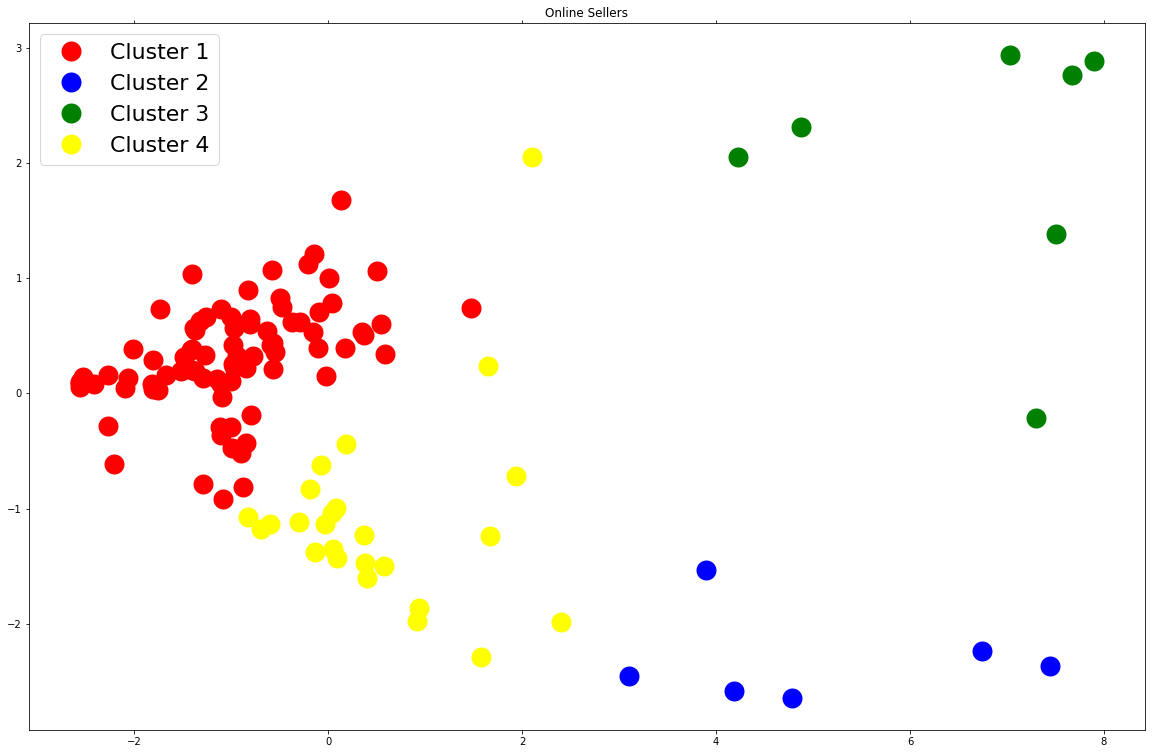

In [145]:
#Set labels variable from kmeans, name labels
labels = km.labels_

#Set X and Y as the first and second columns of PCA
x, y = X_train_pca[:, 0], X_train_pca[:, 1]
#set colors dictionary, name colors
colors = {0: 'red',
         1: 'blue',
         2: 'green',
         3: 'yellow'}
#Set names dictionary, name names
names = {0:'Cluster 1',
        1: 'Cluster 2',
        2: 'Cluster 3',
        3: 'Cluster 4'}
#Create df viewing 
df_vis = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df_vis.groupby('label')
fig, ax = plt.subplots(figsize=(20, 13))
for name, group in groups:
   ax.plot(group.x, group.y, marker='o', linestyle='', ms=20,
           color=colors[name],label=names[name], mec='none')
   ax.set_aspect('auto')
   ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
   ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(prop={'size': 22}, loc= 'best')
ax.set_title("Online Sellers")
plt.show()

# BIRCH Clustering

In [146]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
model = Birch(threshold=0.01, n_clusters=4)
# fit the model
model.fit(principalDf)
# assign a cluster to each example
yhat = model.predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)


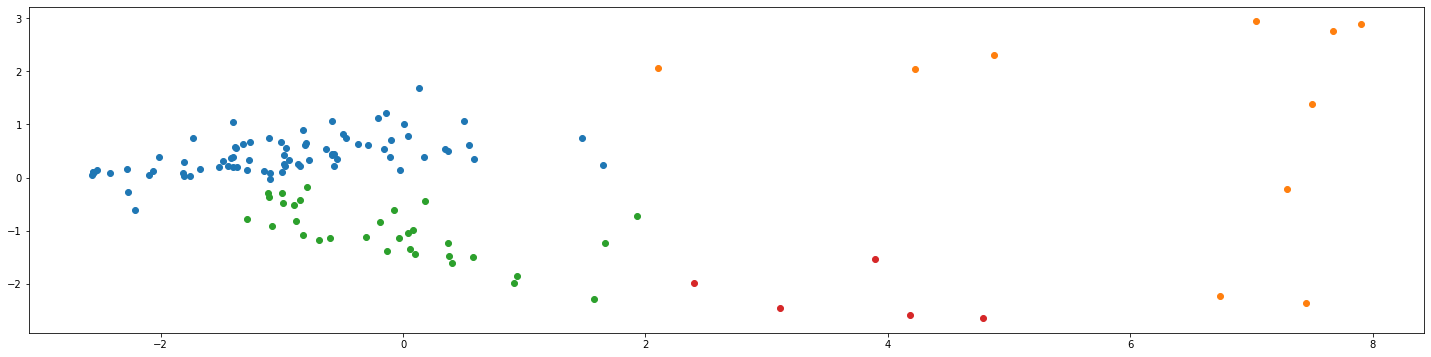

In [147]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train_pca[row_ix, 0], X_train_pca[row_ix, 1])
# show the plot
pyplot.show()

# DBSCAN

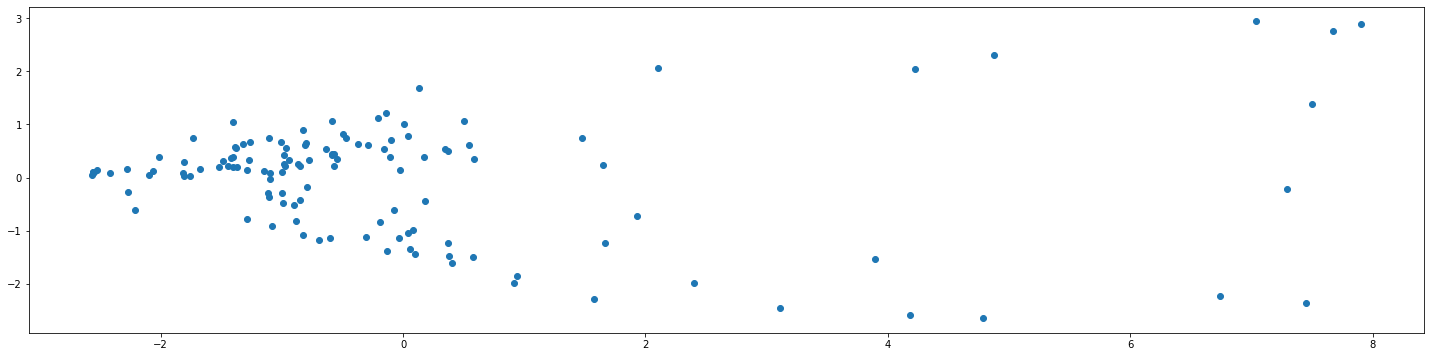

In [148]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define the model
model = DBSCAN(eps=0.05, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train_pca[row_ix, 0], X_train_pca[row_ix, 1])
# show the plot
pyplot.show()

# Gaussian Mixture

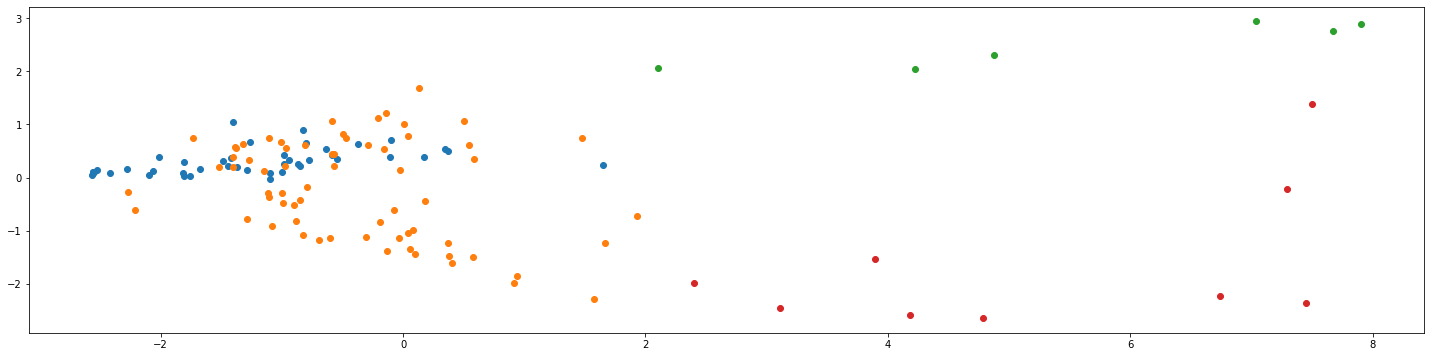

In [150]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components=4)
# fit the model
model.fit(principalDf)
# assign a cluster to each example
yhat = model.predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_train_pca[row_ix, 0], X_train_pca[row_ix, 1])
# show the plot
pyplot.show()